# <div style="text-align: right;font-family:Times New Roman">Приложение Б-6</div>
# <div style="text-align: center;font-family:Times New Roman">Создание рисунков</div>

# Creating figures
# Создание рисунков
---
In this notebook figures for the article are created

В данном блоконте создаются иллюстрации к работе

### Importing dependencies
### Импорт необходимых библиотек

In [1]:
import os
import random
import re
import numpy as np
import matplotlib
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches, colors
import seaborn as sns
import geopandas as gpd
from osgeo import gdal
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rasterio.merge
import rasterio.fill
from rasterio.io import MemoryFile
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em
import fiona
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Sentinel-2 bands
### Каналы снимка Sentinel-2

In [12]:
img = r"F:\Work\CorrProizv\superres\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830_superresolution.tif"
with rio.open(img) as bands:
    img = bands.read()
    meta = bands.profile
    descs = bands.descriptions

In [13]:
img.shape

(12, 10980, 10980)

In [15]:
img = img[[10, 2, 1, 0, 4, 5, 6, 3, 7, 11, 8, 9]]

In [14]:
descs

('SR B4 (665 nm)',
 'SR B3 (560 nm)',
 'SR B2 (490 nm)',
 'SR B8 (842 nm)',
 'SR B5 (705 nm)',
 'SR B6 (740 nm)',
 'SR B7 (783 nm)',
 'SR B8A (865 nm)',
 'SR B11 (1610 nm)',
 'SR B12 (2190 nm)',
 'SR B1 (443 nm)',
 'SR B9 (945 nm)')

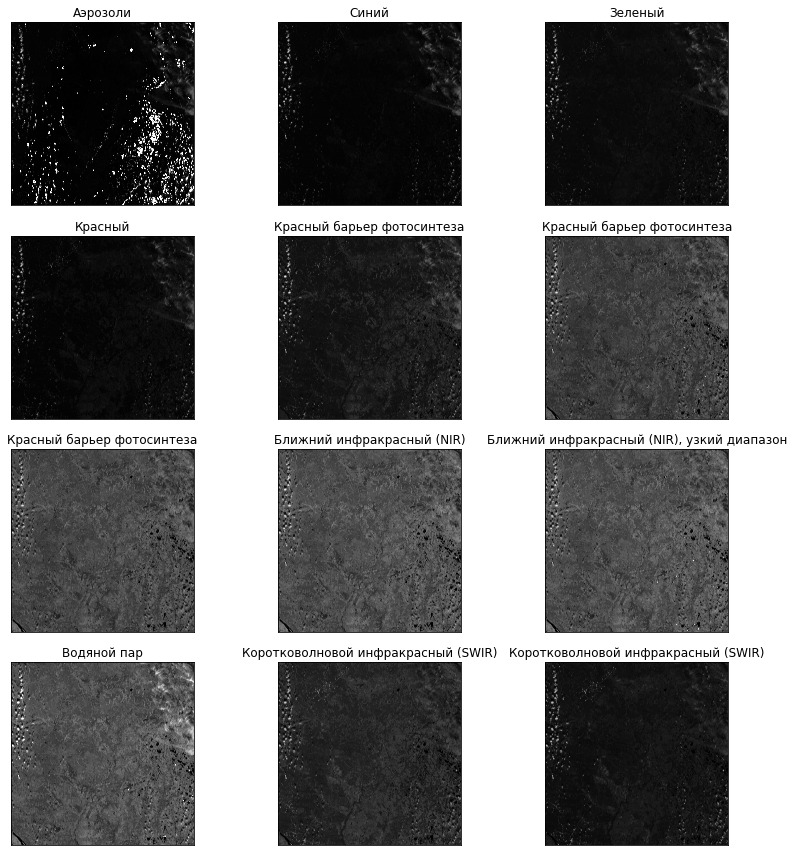

In [17]:
band_titles = ["Аэрозоли", "Синий", "Зеленый", "Красный", "Красный барьер фотосинтеза", "Красный барьер фотосинтеза", 
               "Красный барьер фотосинтеза", "Ближний инфракрасный (NIR)", "Ближний инфракрасный (NIR), узкий диапазон", 
               "Водяной пар", "Коротковолновой инфракрасный (SWIR)", "Коротковолновой инфракрасный (SWIR)"]
ep.plot_bands(img, title=band_titles, cbar=False, vmax = 10000)
plt.show()

### Sentinel-2 bands with cloud mask
### Каналы снимка Sentinel-2 с наложенной маской

In [23]:
path = r'F:\Work\CorrProizv\projected\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\'
bands = glob(path+"*.tif")
bands = [bands[i] for i in [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2]]
bands

['F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B1.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B2.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B3.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B4.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B5.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B6.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B7.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B8.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A_20200814T065629_N9999_R063_T42VVQ_20210913T075830\\B8A.tif',
 'F:\\Work\\CorrProizv\\projected\\S2B_MSIL2A

In [24]:
land_stack, land_meta = es.stack(bands,nodata=0)

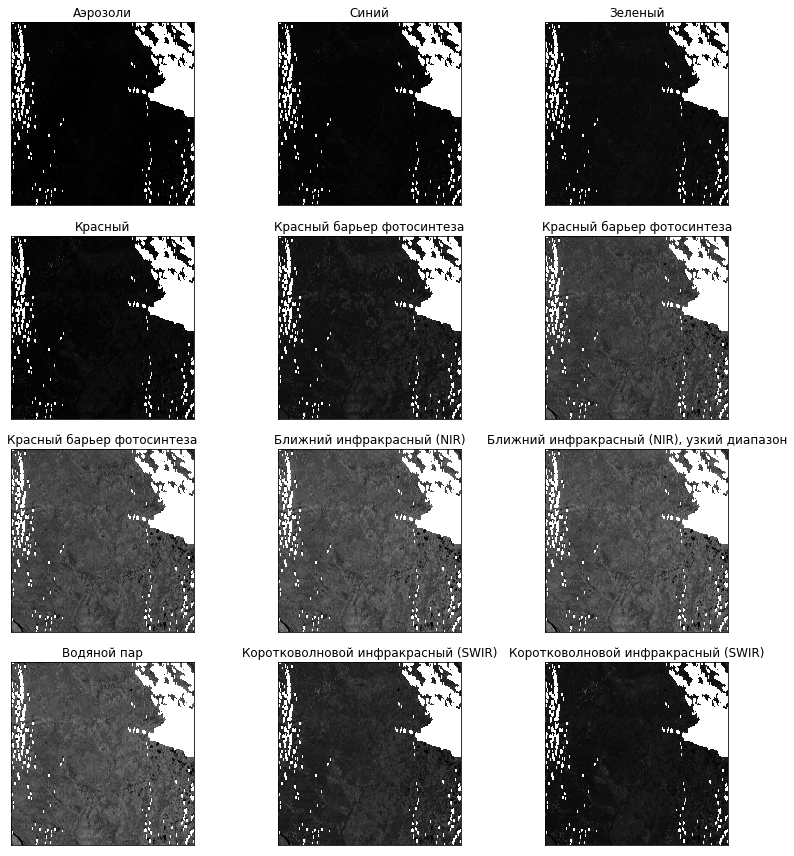

In [26]:
band_titles = ["Аэрозоли", "Синий", "Зеленый", "Красный", "Красный барьер фотосинтеза", "Красный барьер фотосинтеза", 
               "Красный барьер фотосинтеза", "Ближний инфракрасный (NIR)", "Ближний инфракрасный (NIR), узкий диапазон", 
               "Водяной пар", "Коротковолновой инфракрасный (SWIR)", "Коротковолновой инфракрасный (SWIR)"]
ep.plot_bands(land_stack, title=band_titles, cbar=False, vmax = 10000)
plt.show()

### Model performance estimation
### Оценка качества модели
---
Dictionaries with models metrics

Словари с метриками моделей

In [14]:
ubad = {'loss': [1228487.25, 137.81797790527344, 0.77144455909729, 1.5259021520614624, 2.012409210205078],
 'accuracy': [0.7478520274162292, 0.7490911483764648, 0.7486382126808167, 0.7460523247718811, 0.7458475232124329],
 'precision': [0.9856136441230774, 0.9989317059516907, 0.999041736125946, 0.9979657530784607, 0.9978677034378052],
 'recall': [0.5821154713630676, 0.5661795735359192, 0.572289228439331, 0.5680405497550964, 0.5679402947425842],
 'MAE': [0.04365701973438263, 0.04369114339351654, 0.04331611841917038, 0.04381644353270531, 0.04387417808175087],
 'auc': [0.9787963628768921, 0.9816577434539795, 0.9818679094314575, 0.9804100394248962, 0.9802294373512268],
 'val_loss': [0.6462847590446472, 0.6415809392929077, 0.6617223620414734, 0.6567978262901306, 0.6641280651092529],
 'val_accuracy': [0.7506366968154907, 0.7513574361801147, 0.7506945133209229, 0.7501956820487976, 0.7501528859138489],
 'val_precision': [0.9998922348022461, 0.9999049305915833, 0.9994361400604248, 0.9999175071716309, 0.9999186396598816],
 'val_recall': [0.5658881664276123, 0.56661057472229, 0.5675565600395203, 0.5680751800537109, 0.5688097476959229],
 'val_MAE': [0.043695565313100815, 0.04339063912630081, 0.043706778436899185, 0.043642040342092514, 0.043586041778326035],
 'val_auc': [0.9818442463874817, 0.9823120832443237, 0.9820632338523865, 0.9816701412200928, 0.9816520810127258]}

In [2]:
unet = {'loss': [0.4046, 0.3705, 0.3499, 0.3458, 0.3428, 0.34030860662460327, 0.33812659978866577, 0.3359527587890625, 
  0.3315733075141907, 0.3302082419395447, 0.32915371656417847, 0.32809051871299744, 0.3268054723739624, 0.3250522315502167, 
  0.32316771149635315, 0.32151734828948975, 0.3200722336769104, 0.3188088834285736, 0.31764858961105347, 0.3164924383163452],
 'accuracy': [0.8563, 0.8656, 0.8717, 0.8729, 0.8738, 0.8745589852333069, 0.8751804828643799, 0.8758410215377808,
  0.8772223591804504, 0.8776218891143799, 0.8779910802841187, 0.8783040642738342, 0.8787323236465454, 0.8792669773101807,
  0.8797903060913086, 0.8802225589752197, 0.8806324005126953, 0.8809046149253845, 0.8813313841819763, 0.8816524744033813],
 'precision': [0.9299, 0.9330, 0.9340, 0.9337, 0.9336, 0.9334188103675842, 0.9331514239311218, 0.9331044554710388,
  0.9331106543540955, 0.9331945776939392, 0.9330999851226807, 0.9330139756202698, 0.9330273866653442, 0.932870090007782,
  0.9328112006187439, 0.9329028725624084, 0.9329884052276611, 0.9331595301628113, 0.9331328868865967, 0.9331409335136414],
 'recall': [0.8037, 0.8183, 0.8271, 0.8290, 0.8304, 0.8317263722419739, 0.8330076932907104, 0.8339887261390686,
  0.8362736701965332, 0.8368655443191528, 0.8375145196914673, 0.8382101058959961, 0.8389793038368225, 0.8399330973625183,
  0.8407631516456604, 0.841275691986084, 0.8419431447982788, 0.8422630429267883, 0.8428939580917358, 0.8434082865715027],
 'MAE': [0.0272, 0.0254, 0.0244, 0.0241, 0.0240, 0.0238556601107120, 0.0237421635538339, 0.023630693554878235,
  0.02340066619217395, 0.0233262833207845, 0.02326522953808307, 0.02320385165512561, 0.02313247509300708, 0.0230382978916168, 
  0.02295215241611004, 0.02287611365318298, 0.0227958038449287, 0.02273954264819622, 0.02267459966242313, 0.022616909816861153],
 'auc': [0.9927, 0.9939, 0.9946, 0.9947, 0.9948, 0.9948729276657104, 0.9949328303337097, 0.9949934482574463, 0.9951233267784119,
  0.9951567053794861, 0.995186984539032, 0.9952163100242615, 0.9952548742294312, 0.9953002333641052, 0.9953530430793762,
  0.995392918586731, 0.9954279065132141, 0.9954656362533569, 0.9954894185066223, 0.9955267310142517],
 'val_loss': [0.4052, 0.5093, 0.3429, 0.3396, 0.3360, 0.34910082817077637, 0.33019915223121643, 0.3350713551044464,
  0.32486847043037415, 0.3231837749481201, 0.32285457849502563, 0.3278125524520874, 0.320856511592865, 0.3207024335861206,
  0.3178325891494751, 0.31592899560928345, 0.31226542592048645, 0.31400206685066223, 0.31802821159362793, 0.3124525845050812],
 'val_accuracy': [0.8485, 0.8565, 0.8744, 0.8754, 0.8755, 0.8691218495368958, 0.8783435225486755, 0.8768777847290039,
  0.8795140385627747, 0.8800628781318665, 0.8803017735481262, 0.8784505724906921, 0.880506157875061, 0.8811123371124268,
  0.8817165493965149, 0.882574200630188, 0.8833900690078735, 0.8829663395881653, 0.8817330598831177, 0.883530855178833],
 'val_precision': [0.9428, 0.8737, 0.9367, 0.9339, 0.9253, 0.9422603845596313, 0.9427242875099182, 0.9308805465698242,
  0.9325798749923706, 0.9322391152381897, 0.9401775002479553, 0.9412615895271301, 0.9356489181518555, 0.9360655546188354,
  0.9332968592643738, 0.9355171322822571, 0.9349309206008911, 0.9333630204200745, 0.9408380389213562, 0.9395284056663513],
 'val_recall': [0.7904, 0.8485, 0.8283, 0.8340, 0.8417, 0.8139634132385254, 0.8274451494216919, 0.839008629322052,
  0.8403723239898682, 0.8412809371948242, 0.8330547213554382, 0.8297404050827026, 0.8393425941467285, 0.8397592306137085,
  0.8437374830245972, 0.8420905470848083, 0.8444287776947021, 0.8449181914329529, 0.8338455557823181, 0.8389376401901245],
 'val_MAE': [0.0273, 0.0239, 0.0240, 0.0237, 0.0230, 0.02508043870329857, 0.024151340126991272, 0.02311914786696434,
  0.02293826453387737, 0.02296813949942588, 0.02362529747188091, 0.02378111891448497, 0.02301243878901004, 0.02302130684256553,
  0.02264238335192203, 0.02273319289088249, 0.02247676253318786, 0.02238083444535732, 0.02359604090452194, 0.02285027131438255],
 'val_auc': [0.9926, 0.9855, 0.9948, 0.9949, 0.9950, 0.9947657585144043, 0.9954004287719727, 0.9947232604026794,
  0.9953233599662781, 0.9954641461372375, 0.9955589771270752, 0.9953684210777283, 0.9955205917358398, 0.9954749345779419,
  0.9955483078956604, 0.9956029653549194, 0.9956976175308228, 0.9955564141273499, 0.9957339763641357, 0.995797336101532]}

In [3]:
deeplab = {'loss': [0.40861448645591736, 0.3713196814060211, 0.3583516478538513, 0.35140788555145264, 0.34564128518104553,
  0.32971999049186707, 0.32630953192710876, 0.32413461804389954, 0.32022470235824585, 0.31898000836372375, 0.317842960357666,
  0.3167879581451416, 0.31574907898902893, 0.31484776735305786, 0.31396493315696716, 0.3122, 0.3114, 0.3104, 0.3059, 0.3048, 
  0.3038, 0.3027, 0.3018, 0.3007, 0.2995, 0.2983, 0.2972, 0.2960],
 'accuracy': [0.8541779518127441, 0.8641982674598694, 0.8680235147476196, 0.8700066208839417, 0.8718041181564331,
  0.8766089677810669, 0.8777402639389038, 0.8785399794578552, 0.87978595495224, 0.8802979588508606, 0.880614697933197,
  0.8809626698493958, 0.8814296722412109, 0.8816781044006348, 0.8819500803947449, 0.8826, 0.8829, 0.8833, 0.8849, 0.8852, 
  0.8857, 0.8861, 0.8864, 0.8869, 0.8873, 0.8878, 0.8882, 0.8887],
 'precision': [0.9307757616043091, 0.9311903119087219, 0.9307900071144104, 0.9310300946235657, 0.9310213923454285,
  0.9319611191749573, 0.9323045611381531, 0.9322201013565063, 0.9323010444641113, 0.9324448704719543, 0.9324588775634766,
  0.9324520826339722, 0.9324784874916077, 0.9323923587799072, 0.9324711561203003, 0.9324, 0.9323, 0.9324, 0.9323, 0.9324, 
  0.9323, 0.9324, 0.9323, 0.9323, 0.9324, 0.9324, 0.9324, 0.9324],
 'recall': [0.7993984818458557, 0.8164581656455994, 0.8227159380912781, 0.8258707523345947, 0.828777015209198,
  0.8359874486923218, 0.837548553943634, 0.8388542532920837, 0.8408458828926086, 0.8414974808692932, 0.8420800566673279,
  0.8427063822746277, 0.8433452844619751, 0.8438505530357361, 0.8442971706390381, 0.8454, 0.8460, 0.8465, 0.8492, 0.8498, 
  0.8505, 0.8511, 0.8517, 0.8523, 0.8531, 0.8538, 0.8545, 0.8553],
 'MAE': [0.027465684339404106, 0.025581909343600273, 0.024922151118516922, 0.024568716064095497, 0.024256227537989616,
  0.02346930466592312, 0.023280447348952293, 0.02314699999988079, 0.02293928898870945, 0.022863328456878662,
  0.022797709330916405, 0.022734828293323517, 0.022673407569527626, 0.022622177377343178, 0.02257242612540722,
  0.0225, 0.0224, 0.0224, 0.0221, 0.0220, 0.0220, 0.0219, 0.0218, 0.0218, 0.0217, 0.0216, 0.0215, 0.0215],
 'auc': [0.9925927519798279, 0.9939219951629639, 0.9943280220031738, 0.9945363402366638, 0.9947051405906677, 0.9952101111412048,
  0.9953026175498962, 0.9953567385673523, 0.995468258857727, 0.9954984188079834, 0.9955299496650696, 0.9955547451972961,
  0.9955796003341675, 0.9956080317497253, 0.995628297328949, 0.9957, 0.9957, 0.9957, 0.9958, 0.9959, 0.9959, 0.9959, 0.9959, 
  0.9960, 0.9960, 0.9960, 0.9960, 0.9961],
 'val_loss': [0.559540867805481, 0.39578402042388916, 0.39183589816093445, 0.37371036410331726, 0.43914809823036194,
  0.3207986652851105, 0.32025086879730225, 0.3208140730857849, 0.31422364711761475, 0.31392526626586914, 0.3206908702850342,
  0.3125816881656647, 0.3129063546657562, 0.31298720836639404, 0.3151933252811432, 0.3123, 0.3101, 0.3143, 0.3084, 0.3091, 
  0.3094, 0.3104, 0.3190, 0.3087, 0.3074, 0.3148, 0.3133, 0.3100],
 'val_accuracy': [0.8502100706100464, 0.8601802587509155, 0.8562253713607788, 0.8654488921165466, 0.8360373377799988,
  0.8804832696914673, 0.8797562718391418, 0.8801310062408447, 0.8820318579673767, 0.882415235042572, 0.8806219696998596,
  0.8826902508735657, 0.882227897644043, 0.8826447129249573, 0.8826286792755127, 0.8828, 0.8837, 0.8820, 0.8845, 0.8834, 
  0.8839, 0.8836, 0.8798, 0.8840, 0.8848, 0.8813, 0.8826, 0.8837],
 'val_precision': [0.8588384985923767, 0.923540472984314, 0.9049614667892456, 0.905036449432373, 0.9330837726593018,
  0.9334725141525269, 0.9372217655181885, 0.9266706705093384, 0.9371406435966492, 0.9370742440223694, 0.9243669509887695,
  0.9360506534576416, 0.9357811212539673, 0.9401687383651733, 0.9277571439743042, 0.9388, 0.9330, 0.9392, 0.9359, 0.9348, 
  0.9321, 0.9332, 0.9369, 0.9354, 0.9315, 0.9345, 0.9302, 0.9345],
 'val_recall': [0.846159040927887, 0.8165103793144226, 0.8262109756469727, 0.8425291180610657, 0.7861678600311279,
  0.8410614132881165, 0.8366496562957764, 0.8482498526573181, 0.8405571579933167, 0.8407021164894104, 0.8498852849006653,
  0.8418921828269958, 0.8421772122383118, 0.8374611139297485, 0.8501178622245789, 0.8391, 0.8462, 0.8370, 0.8452, 0.8445,
  0.8479, 0.8464, 0.8364, 0.8451, 0.8504, 0.8419, 0.8476, 0.8458],
 'val_MAE': [0.0234092827886343, 0.027279948815703392, 0.02591589279472828, 0.023644939064979553, 0.027659807354211807,
  0.02302154339849949, 0.023197907954454422, 0.02239639312028885, 0.022924460470676422, 0.023075705394148827,
  0.022246448323130608, 0.022737983614206314, 0.022735707461833954, 0.02289304882287979, 0.022279445081949234,
  0.0230, 0.0224, 0.0232, 0.0226, 0.0222, 0.0224, 0.0225, 0.0233, 0.0223, 0.0219, 0.0226, 0.0226, 0.0224],
 'val_auc': [0.9837664365768433, 0.993373692035675, 0.9930166602134705, 0.9934046864509583, 0.9913401007652283,
  0.9954934120178223, 0.9955443143844604, 0.9953938722610474, 0.9957600831985474, 0.995773434638977, 0.9953848123550415,
  0.9957416653633118, 0.9957656860351562, 0.995766818523407, 0.9956128001213074, 0.9958, 0.9957, 0.9958, 0.9959, 0.9957, 
  0.9958, 0.9958, 0.9956, 0.9958, 0.9957, 0.9956, 0.9956, 0.9958]}

### Loss / Потери

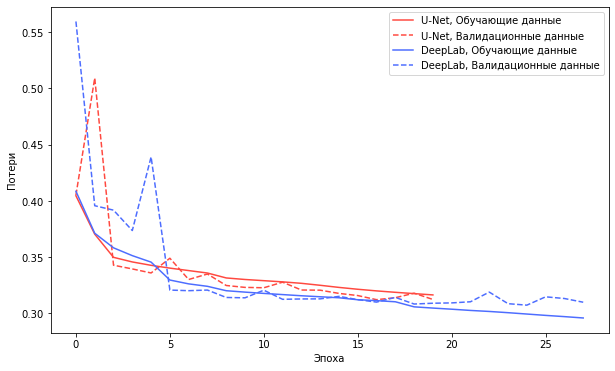

In [16]:
fig, ax = plt.subplots(figsize = (10, 6))
#sns.set_palette(sns.color_palette("cubehelix", 5))
#ax.plot(ubad['loss'], color = '#55d960', label = 'U-Net, Обучающие данные');
#ax.plot(ubad['val_loss'], color = '#55d960', label = 'U-Net, Валидационные данные');
ax.plot(unet['loss'], color = '#ff4940', label = 'U-Net, Обучающие данные');
ax.plot(unet['val_loss'], color = '#ff4940', label = 'U-Net, Валидационные данные');
ax.plot(deeplab['loss'], color = '#4d6dff', label = 'DeepLab, Обучающие данные');
ax.plot(deeplab['val_loss'], color = '#4d6dff', label = 'DeepLab, Валидационные данные');
ax.lines[1].set_linestyle("--")
#ax.lines[2].set_linestyle("-.")
ax.lines[3].set_linestyle("--")
#ax.lines[4].set_linestyle(":")
ax.set(xlabel='Эпоха', ylabel='Потери')
ax.legend();

### Accuracy / точность

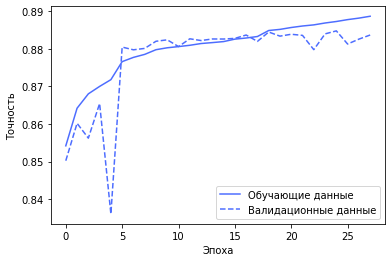

In [6]:
fig, ax = plt.subplots(figsize = (6, 4))
#sns.set_palette(sns.color_palette("cubehelix", 5))
ax.plot(deeplab['accuracy'], color = '#4d6dff', label = 'Обучающие данные');
ax.plot(deeplab['val_accuracy'], color = '#4d6dff', label = 'Валидационные данные');
ax.lines[1].set_linestyle("--")
#ax.lines[2].set_linestyle("-.")
#ax.lines[3].set_linestyle("--")
#ax.lines[4].set_linestyle(":")
ax.set(xlabel='Эпоха', ylabel='Точность')
ax.legend();

### Precision, recall

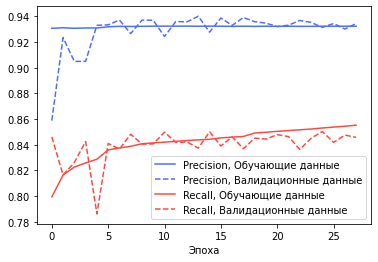

In [9]:
fig, ax = plt.subplots(figsize = (6, 4))
#sns.set_palette(sns.color_palette("cubehelix", 5))
ax.plot(deeplab['precision'], color = '#4d6dff', label = 'Precision, Обучающие данные');
ax.plot(deeplab['val_precision'], color = '#4d6dff', label = 'Precision, Валидационные данные');
ax.plot(deeplab['recall'], color = '#ff4940', label = 'Recall, Обучающие данные');
ax.plot(deeplab['val_recall'], color = '#ff4940', label = 'Recall, Валидационные данные');
ax.lines[1].set_linestyle("--")
#ax.lines[2].set_linestyle("-.")
ax.lines[3].set_linestyle("--")
#ax.lines[4].set_linestyle(":")
ax.set(xlabel='Эпоха', ylabel='')
ax.legend();

### Mean Absolute Error / Средняя абсолютная ошибка

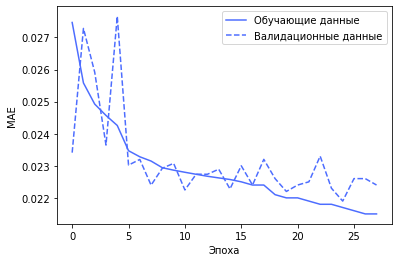

In [12]:
fig, ax = plt.subplots(figsize = (6, 4))
#sns.set_palette(sns.color_palette("cubehelix", 5))
ax.plot(deeplab['MAE'], color = '#4d6dff', label = 'Обучающие данные');
ax.plot(deeplab['val_MAE'], color = '#4d6dff', label = 'Валидационные данные');
ax.lines[1].set_linestyle("--")
#ax.lines[2].set_linestyle("-.")
#ax.lines[3].set_linestyle("--")
#ax.lines[4].set_linestyle(":")
ax.set(xlabel='Эпоха', ylabel='MAE')
ax.legend();

### ROC AUC

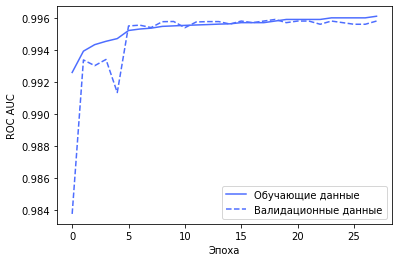

In [13]:
fig, ax = plt.subplots(figsize = (6, 4))
#sns.set_palette(sns.color_palette("cubehelix", 5))
ax.plot(deeplab['auc'], color = '#4d6dff', label = 'Обучающие данные');
ax.plot(deeplab['val_auc'], color = '#4d6dff', label = 'Валидационные данные');
ax.lines[1].set_linestyle("--")
#ax.lines[2].set_linestyle("-.")
#ax.lines[3].set_linestyle("--")
#ax.lines[4].set_linestyle(":")
ax.set(xlabel='Эпоха', ylabel='ROC AUC')
ax.legend();

### Species structure / преобладающие древесные породы

In [ ]:
with rio.open(r'F:\Work\CorrProizv\y_spec2.tif') as f:
    y_true = f.read(1)

In [ ]:
hmao_unique, hmao_counts = np.unique(y_true, return_counts=True)

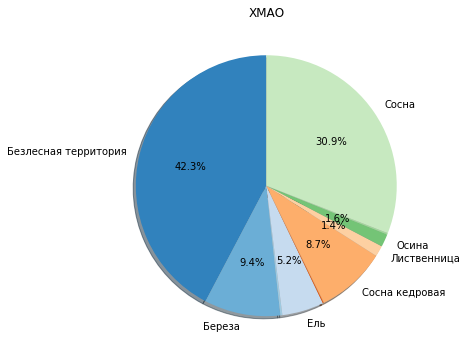

In [70]:
labels =  ['Безлесная территория', 'Береза', '', 'Ель', '', '', 'Сосна кедровая', 'Лиственница', '', 'Осина', '', 'Сосна', '']

def make_autopct(values):
    def my_autopct(pct):
        if pct >=1:
            return '{p:.1f}%'.format(p = pct)
        else:
            return None
    return my_autopct

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(12))

fig1, ax1 = plt.subplots(figsize = (8, 6))
ax1.pie(hmao_counts[1:], labels=labels, autopct=make_autopct(hmao_counts[1:]), 
        shadow=True, startangle=90, colors = outer_colors)
ax1.set(aspect="equal", title='ХМАО')
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [71]:
with rio.open(r'F:\Work\CorrProizv\tests\ynao\y_pred_1.tif') as f:
    y_ynao = f.read(1)

In [72]:
ynao_unique, ynao_counts = np.unique(y_ynao, return_counts=True)

In [81]:
ynao_unique.astype('int32')

array([-1,  0,  1,  2,  3,  4,  6,  7, 11])

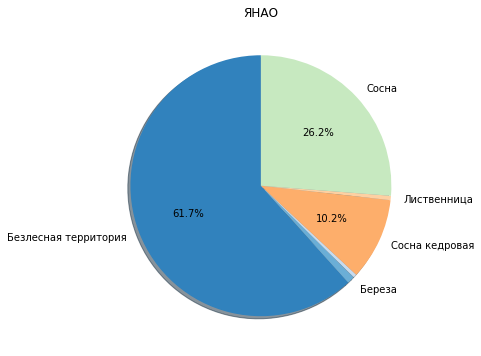

In [83]:
labels =  ['Безлесная территория', 'Береза', '', '', '',  'Сосна кедровая', 'Лиственница', 'Сосна']

def make_autopct(values):
    def my_autopct(pct):
        if pct >=1:
            return '{p:.1f}%'.format(p = pct)
        else:
            return None
    return my_autopct

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(12))
outer_colors = outer_colors[ynao_unique[1:].astype('int32') - 1]

fig1, ax1 = plt.subplots(figsize = (8, 6))
ax1.pie(ynao_counts[1:], labels=labels, autopct=make_autopct(ynao_counts[1:]), 
        shadow=True, startangle=90, colors = outer_colors)
ax1.set(aspect="equal", title='ЯНАО')
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [87]:
with rio.open(r'F:\Work\CorrProizv\tests\krasnoyarsk\irb\y_pred_1.tif') as f:
    y_irb = f.read(1).flatten()

In [88]:
with rio.open(r'F:\Work\CorrProizv\tests\krasnoyarsk\cur\y_pred_1.tif') as f:
    y_cur = f.read(1).flatten()

In [89]:
with rio.open(r'F:\Work\CorrProizv\tests\krasnoyarsk\sb\y_pred_1.tif') as f:
    y_sb = f.read(1).flatten()

In [96]:
y_kras = np.concatenate([y_irb, y_cur, y_sb])

In [97]:
kr_unique, kr_counts = np.unique(y_kras, return_counts=True)

In [99]:
kr_unique

array([ 0.,  1.,  2.,  3.,  4.,  7.,  8., 11., 12.], dtype=float32)

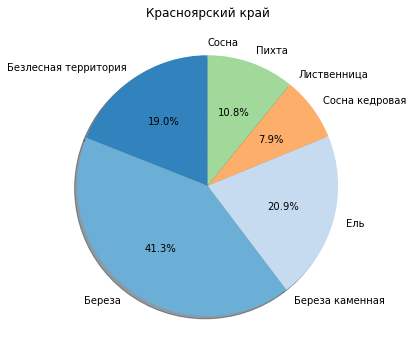

In [102]:
labels =  ['Безлесная территория', 'Береза', 'Береза каменная', 'Ель',  'Сосна кедровая', 'Лиственница', 'Пихта', 'Сосна']

def make_autopct(values):
    def my_autopct(pct):
        if pct >=1:
            return '{p:.1f}%'.format(p = pct)
        else:
            return None
    return my_autopct

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(12))
outer_colors = outer_colors[kr_unique[1:].astype('int32') - 1]

fig1, ax1 = plt.subplots(figsize = (8, 6))
ax1.pie(kr_counts[1:], labels=labels, autopct=make_autopct(kr_counts[1:]), 
        shadow=True, startangle=90, colors = outer_colors)
ax1.set(aspect="equal", title='Красноярский край')
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()